<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Import-libraries-and-cleaned-dataset" data-toc-modified-id="Import-libraries-and-cleaned-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries and cleaned dataset</a></span><ul class="toc-item"><li><span><a href="#This-is-the-dataset-directly-from-cleaning" data-toc-modified-id="This-is-the-dataset-directly-from-cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>This is the dataset directly from cleaning</a></span></li></ul></li><li><span><a href="#Helpers" data-toc-modified-id="Helpers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helpers</a></span></li><li><span><a href="#Preparation-for-Modeling" data-toc-modified-id="Preparation-for-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparation for Modeling</a></span><ul class="toc-item"><li><span><a href="#Classify-rating-score-for-GREAT-coffee" data-toc-modified-id="Classify-rating-score-for-GREAT-coffee-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classify rating score for GREAT coffee</a></span></li><li><span><a href="#Create-dummy-variables-for--coffee-country-and-roast-level" data-toc-modified-id="Create-dummy-variables-for--coffee-country-and-roast-level-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create dummy variables for  coffee country and roast level</a></span></li><li><span><a href="#Create-data-frames-(X-and-y)-for-GREAT-Coffee" data-toc-modified-id="Create-data-frames-(X-and-y)-for-GREAT-Coffee-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create data frames (X and y) for GREAT Coffee</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-for-GREAT-Coffee" data-toc-modified-id="Logistic-Regression-for-GREAT-Coffee-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression for GREAT Coffee</a></span></li><li><span><a href="#Random-Forest-for-GREAT-Coffee" data-toc-modified-id="Random-Forest-for-GREAT-Coffee-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest for GREAT Coffee</a></span></li><li><span><a href="#Random-Forest-Using-SMOTE-for-GREAT-Coffee" data-toc-modified-id="Random-Forest-Using-SMOTE-for-GREAT-Coffee-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest Using SMOTE for GREAT Coffee</a></span></li></ul></li><li><span><a href="#Grid-Search-for-Random-Forest" data-toc-modified-id="Grid-Search-for-Random-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grid Search for Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Graphical-Accuracy-Comparison-for-GREAT-Coffee" data-toc-modified-id="Graphical-Accuracy-Comparison-for-GREAT-Coffee-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Graphical Accuracy Comparison for GREAT Coffee</a></span></li><li><span><a href="#Modeling-for-AWFUL-Coffee" data-toc-modified-id="Modeling-for-AWFUL-Coffee-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modeling for AWFUL Coffee</a></span><ul class="toc-item"><li><span><a href="#XGBoost-for-AWFUL-coffee" data-toc-modified-id="XGBoost-for-AWFUL-coffee-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>XGBoost for AWFUL coffee</a></span></li><li><span><a href="#Random-Forest-with-SMOTE-for-AWFUL-coffee" data-toc-modified-id="Random-Forest-with-SMOTE-for-AWFUL-coffee-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Random Forest with SMOTE for AWFUL coffee</a></span></li></ul></li><li><span><a href="#Extra-code" data-toc-modified-id="Extra-code-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Extra code</a></span></li></ul></div>

# Abstract

Purpose: The purpose of this file, modeling_coffee_reviews, is use the coffee dataset, which was scraped, cleaned and visualized in 3 separate files in this notebook, to run different classication modeling.  The coffees are classified as either GREAT (a rating of 95, 96 or 97) or AWFUL (a rating less than 89). 

Findings: The algorithms that are used to model the data are: 
- Logistic Regression
- Random Forest
- Random Forest with SMOTE
- Random Forest with GridSearch
- XGBoost

The model that performed the most accurately was XGBoost.  A classification report, confusion matrix and plot of feature importances was calculated for each model.  The classification report contains the precision, recall and F1 score.  A confusion matrix is a summary of prediction results and shows the ways in which the classification model is confused when it makes predictions.  

Significance: The XGBoost modeling of GREAT and AWFUL coffee had the highest training and testing accuracy, 99.76%/98.18% and 99.88%/99.45%.  The difference between the training and testing accuracy is minimal, which is ideal, so that the model is not too greatly overfitted.  Accuracy is an evaluation metrix that is defined as: the number of correct predictions over the total number of predictions. 

Conclusions: The important features to consider when purchasing a GREAT coffee are: 
    1. aroma
    2. flavor
    3. body
    4. aftertaste
    5. acidity
    6. the price per ounce 
    9. Kenya
    
For an AWFUL coffee, be aware of:
    1. aftertaste
    2. aroma
    3. body
    4. Agtron ground score
    5. flavor
    6. acidity
    9. Ethiopia
    
The confusion matrix for GREAT and AWFUL coffee are:
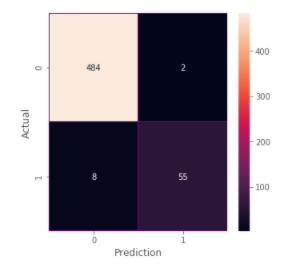

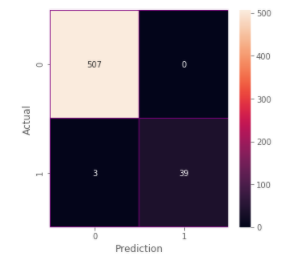


# Import libraries and cleaned dataset

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

from imblearn.over_sampling import SMOTE

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from xgboost import plot_importance

Using TensorFlow backend.


## This is the dataset directly from cleaning
The one used in the sentiment analysis has 6 fewer entries where the "Bottom Line" had null value.  

In [2]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [3]:
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


# Helpers

In [4]:
'''
This is the logistic regression model
It trains, predicts, prints out a classification report and creates a plot
'''
def lr_model(X_train, y_train,X_test,y_test, quality):
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    
    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)
    
    print("For Test Set of {} Coffee:".format(quality))
    lg_report = classification_report(y_test,y_pred_test)
    print(lg_report)
    
    lr_prec = precision_score(y_test, y_pred_test)
    lr_recall = recall_score(y_test, y_pred_test)
    lr_acc_te = accuracy_score(y_test, y_pred_test)
    lr_acc_tr = accuracy_score(y_train, y_pred_train)
    print('Training Accuracy of Logistic Regression: ', round(lr_acc_tr,4)* 100, '%')
    print('Testing Accuracy of Logistic Regression: ', round(lr_acc_te,4)* 100, '%')
    
    feature_importance = abs(model_log.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(20,20))
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center', color='#1c3290')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=15)
    featax.set_xlabel('Relative Importance')
    featax.set_title("Feature Importance for {} Coffee".format(quality), fontsize=30)

    plt.tight_layout()   
    plt.show()
    return lr_acc_tr,lr_acc_te

In [5]:
'''
This helper function is for Random Forest confusion matrix
'''
def plot_confusion(y_test,y_pred_test):
    from sklearn.metrics import confusion_matrix
    c_matrix = confusion_matrix(y_test, y_pred_test)
    
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(c_matrix,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()   

In [6]:
'''
This helper function is for Randon Forest plotting Feature Importance
There are 3 plots available, each one is a bit better than the previous one in readibility
'''
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

def plot_feature_importances(model,quality):

    # Plot 1 is feature importances as a horizontal bar graph and is not sorted which makes it hard to read
#     print("PLOT 1")
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(20,20))
#     plt.barh(range(n_features), model.feature_importances_, align='center',color='#1c3290')  
#     plt.yticks(np.arange(n_features), X.columns.values) 
#     plt.xlabel('Feature importance for {} coffee'.format(quality), fontsize=20)
#     plt.ylabel('Feature',fontsize=20)
#     plt.show()
    
    # Plot 2 is a regular bar graph with sorted values, but hard to read the x-axis values
#     print("PLOT 2")
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(20,20))
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     names = [X.columns.values[i] for i in indices]
#     plt.bar(range(X.shape[1]), importances[indices], color='#1c3290')
#     plt.xticks(range(X.shape[1]), names, rotation=90)
#     plt.show()

    # This third plot has sorted values, is a horizontal bar graph and is easiest to read
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [X.columns.values[i] for i in indices]
    plt.barh(range(X.shape[1]), importances[indices], color='#1c3290')
    plt.yticks(range(X.shape[1]), names)
    plt.xlabel('Feature importance for {} coffee'.format(quality), fontsize=20)
    plt.ylabel('Feature',fontsize=20)
    plt.show()

In [7]:
'''
This helper function is for Random Forest modeling
It trains, predicts and prints out a classication report
The confusion matrix and Feature Importances plots are called from here
'''
def rf_model(X_train, y_train,X_test,y_test, quality):
    forest = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=8)
    forest.fit(X_train, y_train)
    y_pred_test = forest.predict(X_test)
    y_pred_train = forest.predict(X_train)

    print("For Test Set of {} Coffee:".format(quality))
    rf_report = classification_report(y_test, y_pred_test)
    print(rf_report)   
    
    rf_acc_te = accuracy_score(y_test, y_pred_test)
    rf_acc_tr = accuracy_score(y_train,y_pred_train)
    print('Training Accuracy of Random Forest for {} coffee: '.format(quality), round(rf_acc_tr,4)* 100, '%')
    print('Testing Accuracy of Random Forest for {} coffee: '.format(quality), round(rf_acc_te,4)* 100, '%')


    plot_confusion(y_test,y_pred_test)
    plot_feature_importances(forest, quality)
    return rf_acc_tr,rf_acc_te

In [8]:
'''
This helper function is for Random Forest modeling after a CVGridSearch
It trains, predicts and prints out a classication report
The confusion matrix and Feature Importances plots are called from here
'''


def rf_model_gridsearch(X_train, y_train, X_test, y_test, quality, cri, max_dep, min_sam_lea, min_sam_spl, n_est):
    
    forest = RandomForestClassifier(criterion= cri, n_estimators=n_est, max_depth=max_dep,
                                    min_samples_split=min_sam_spl,min_samples_leaf=min_sam_lea)
    forest.fit(X_train, y_train)
    y_pred_test = forest.predict(X_test)
    y_pred_train = forest.predict(X_train)

    print("For Test Set of {} Coffee:".format(quality))
    rf_report = classification_report(y_test, y_pred_test)
    print(rf_report)   
    
    rf_acc_te = accuracy_score(y_test, y_pred_test)
    rf_acc_tr = accuracy_score(y_train,y_pred_train)
    print('Training Accuracy of Random Forest for {} coffee with GridSearch: '.format(quality), round(rf_acc_tr,4)* 100, '%')
    print('Testing Accuracy of Random Forest for {} coffee with GridSearch: '.format(quality), round(rf_acc_te,4)* 100, '%')


    plot_confusion(y_test,y_pred_test)
    plot_feature_importances(forest, quality)
    return rf_acc_tr,rf_acc_te

In [9]:
'''
This helper function is for XGBoost modeling
It trains, predicts and calculates training and testing accuracy, and returns a Feature Importance plot
'''

def xgb_model(X_train_B, y_train_B, X_test_B, y_test_B, quality):
    # Instantiate XGBClassifier
    clf = XGBClassifier()

    # Fit XGBClassifier
    clf.fit(X_train_B, y_train_B)

    # Predict on training and test sets
    training_preds = clf.predict(X_train_B)
    test_preds = clf.predict(X_test_B)

    # Accuracy of training and test sets
    xgb_acc_tr = accuracy_score(y_train_B, training_preds)
    xgb_acc_te = accuracy_score(y_test_B, test_preds)
    
    print("For Test Set of {} Coffee:".format(quality))
    xgb_report = classification_report(y_test_B,test_preds)
    print(xgb_report)

    print('Training Accuracy of XGBoost for {} coffee: {:.4}%'.format(quality, xgb_acc_tr * 100))
    print('Testing Accuracy of XGBoost for {} coffee: {:.4}%'.format(quality, xgb_acc_te * 100))
    
    plot_confusion(y_test_B, test_preds)

    fig,ax = plt.subplots(figsize=(20,20))
    plot_importance(clf,ax=ax,color='#1c3290')
    plt.show()
    return xgb_acc_tr, xgb_acc_te

# Preparation for Modeling 

## Classify rating score for GREAT coffee
Coffee is great or not_great (and alternatively, awful and not_awful)

In [10]:
# A rating of 95 or better is about 10% of the coffees
# A rating of 94 or better is about 25% of the coffees
df['Great'] = [1 if x >= 95 else 0 for x in df['Rating']] 

In [11]:
print('great: ')
print(df.Great.value_counts())

great: 
0    1973
1     222
Name: Great, dtype: int64


## Create dummy variables for  coffee country and roast level

In [12]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')

In [13]:
rl_dummies.head(2)

,RL_Dark,RL_Light,RL_Medium,RL_Medium-Dark,RL_Medium-Light,RL_Very Dark
0,0,0,0,0,1,0
1,0,0,0,0,1,0


In [14]:
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')

In [15]:
 country_dummies.head(2)

,CC_Bolivia,CC_Brazil,CC_Burundi,CC_Colombia,CC_Congo,CC_Costa Rica,CC_Dominican Republic,CC_Ecuador,CC_El Salvador,CC_Ethiopia,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.concat([df, rl_dummies, country_dummies], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,...,0,0,0,0,0,0,0,0,0,0
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,...,0,0,0,0,0,0,0,0,0,0


## Create data frames (X and y) for GREAT Coffee

In [17]:
# Split data into target and features

y = df['Great']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Great','Coffee Country'], axis=1)
# X.columns

In [18]:
# Test-train split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [19]:
# Keep unscaled data for XGBoost
X_train_B = X_train.copy()
X_test_B = X_test.copy()
y_train_B = y_train.copy()
y_test_B = y_test.copy()

In [20]:
# Standard scale data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

scaled_df = pd.DataFrame(X_train, columns=X.columns)

# Modeling

The coffee reviews will be modeled as two different classification datasets.  In the first section, coffee that has a rating greater than 95 is classified as GREAT.  In the second section, a coffee that has a rating less than 89 
The algorithms that will be used to model the data are: 
- Logistic Regression
- Random Forest
- Random Forest with SMOTE
- Random Forest with GridSearch
- XGBoost

A classification report, confusion matrix and/or plot of feature importances will be displayed.  In addition, the testing and training accuracy of each iteration will be calculated.  The accuracy measure is the amount of correct classifications per the total amount of classifications.  A model is considered overfitted if the training accuracy is higher than the testing accuracy.

## Logistic Regression for GREAT Coffee

For Test Set of GREAT Coffee:
              precision    recall  f1-score   support

           0       1.00      0.65      0.78       486
           1       0.27      1.00      0.42        63

   micro avg       0.69      0.69      0.69       549
   macro avg       0.63      0.82      0.60       549
weighted avg       0.92      0.69      0.74       549

Training Accuracy of Logistic Regression:  67.86 %
Testing Accuracy of Logistic Regression:  68.67 %


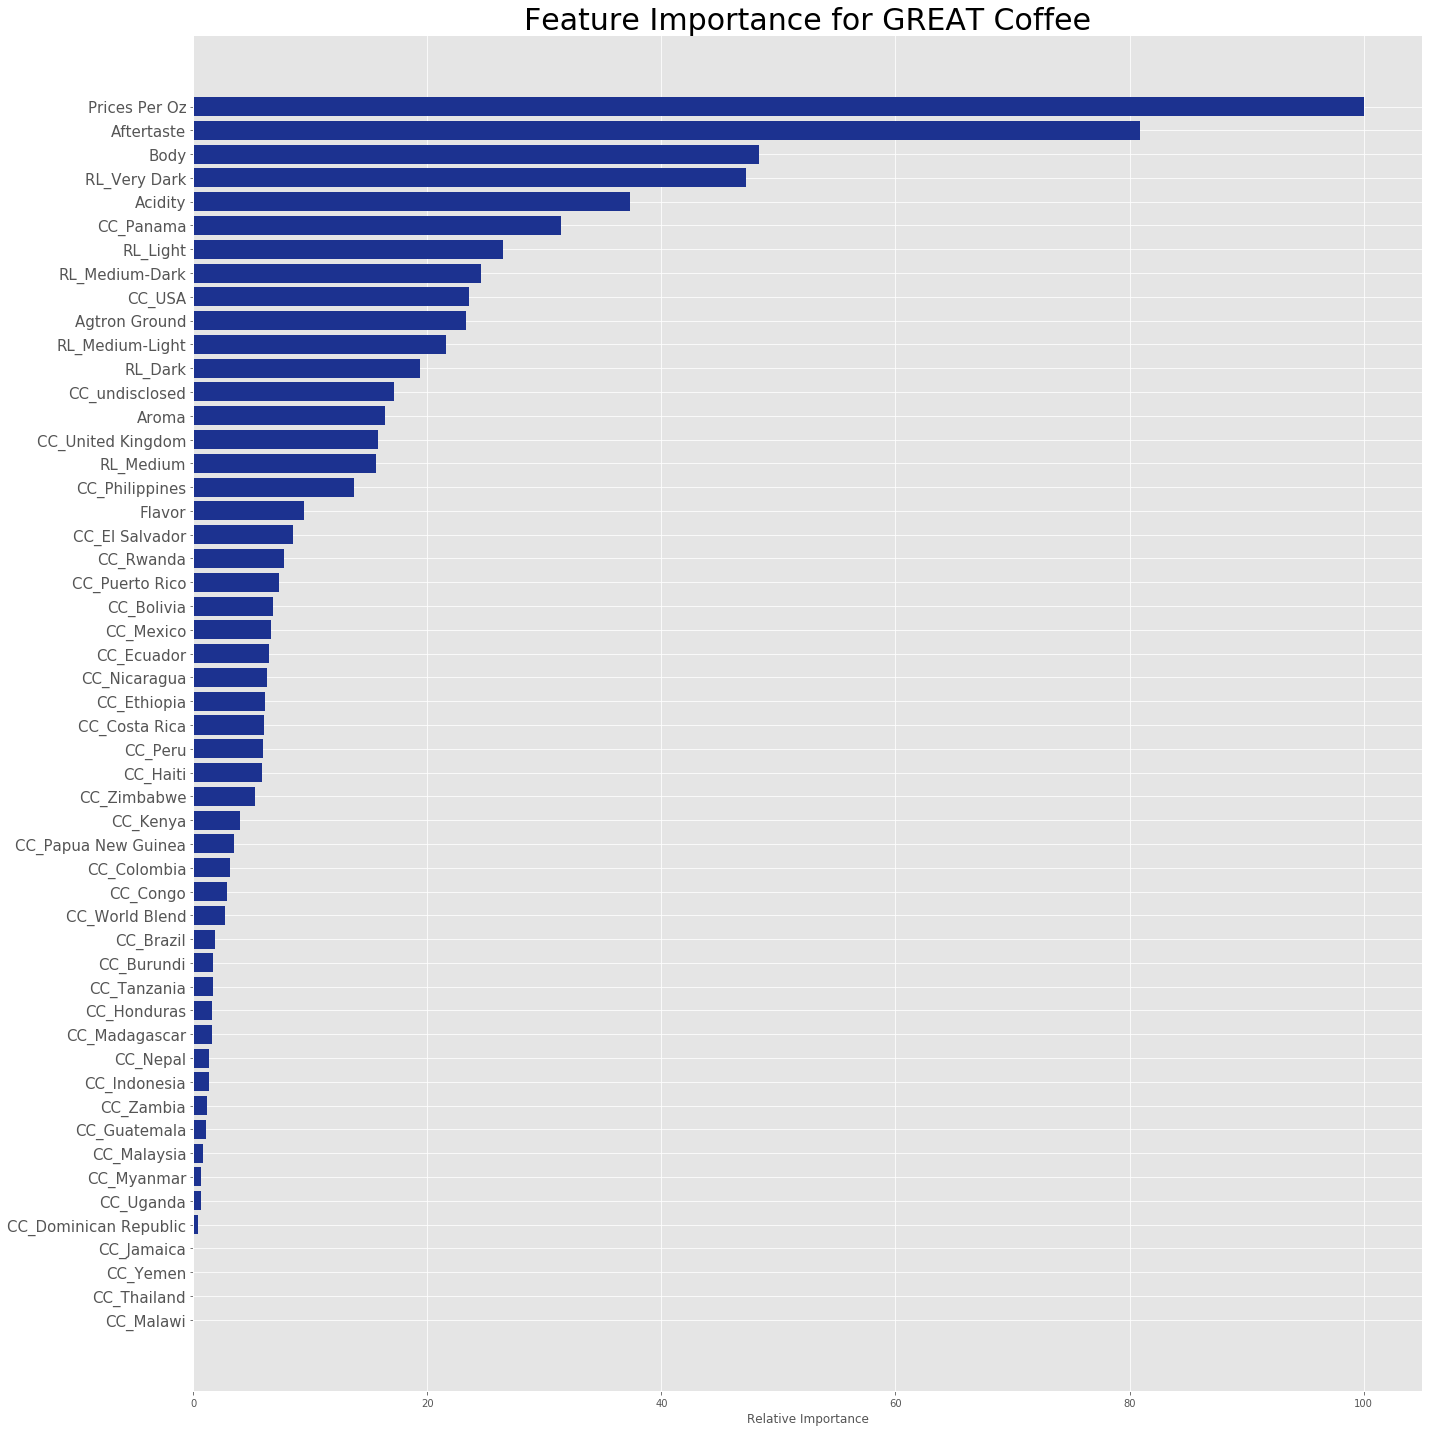

In [21]:
lr_acc_tr, lr_acc_te = lr_model(X_train,y_train, X_test,y_test,'GREAT')

In [22]:
# print(lr_acc_tr)
# print(lr_acc_te)

## Random Forest for GREAT Coffee

For Test Set of GREAT Coffee:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       486
           1       1.00      0.35      0.52        63

   micro avg       0.93      0.93      0.93       549
   macro avg       0.96      0.67      0.74       549
weighted avg       0.93      0.93      0.91       549

Training Accuracy of Random Forest for GREAT coffee:  95.14 %
Testing Accuracy of Random Forest for GREAT coffee:  92.53 %


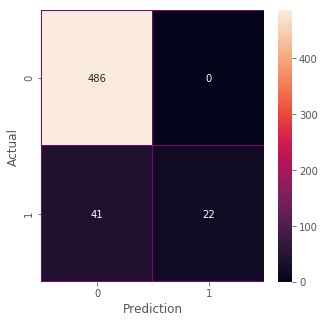

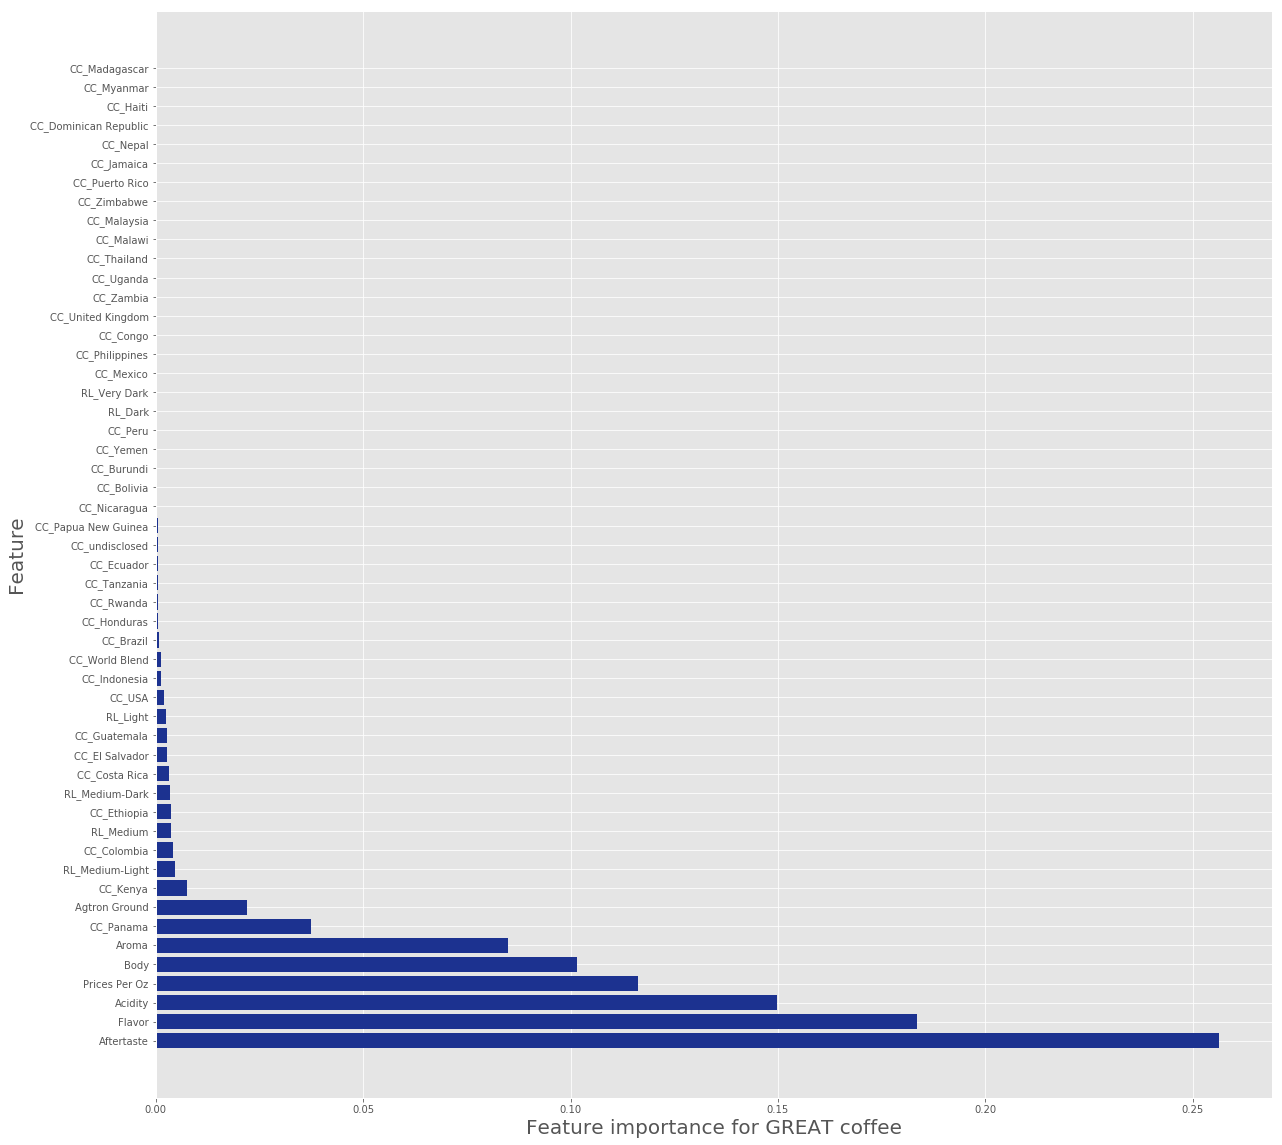

In [23]:
# rf_model(X_train,y_train,"GREAT")
rf_acc_tr, rf_acc_te = rf_model(X_train,y_train,X_test,y_test,"GREAT")

## Random Forest Using SMOTE for GREAT Coffee

In [24]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [25]:
print("Resampled X_train: ", len(X_train_resampled))
print("Resampled y_train: ", len(y_train_resampled))

Resampled X_train:  2974
Resampled y_train:  2974


For Test Set of GREAT Coffee:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       486
           1       0.89      0.86      0.87        63

   micro avg       0.97      0.97      0.97       549
   macro avg       0.93      0.92      0.93       549
weighted avg       0.97      0.97      0.97       549

Training Accuracy of Random Forest for GREAT coffee:  99.39 %
Testing Accuracy of Random Forest for GREAT coffee:  97.09 %


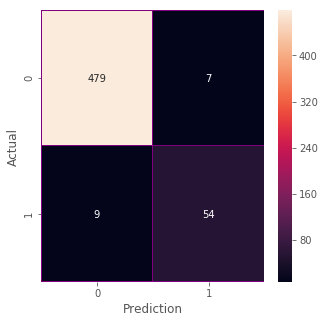

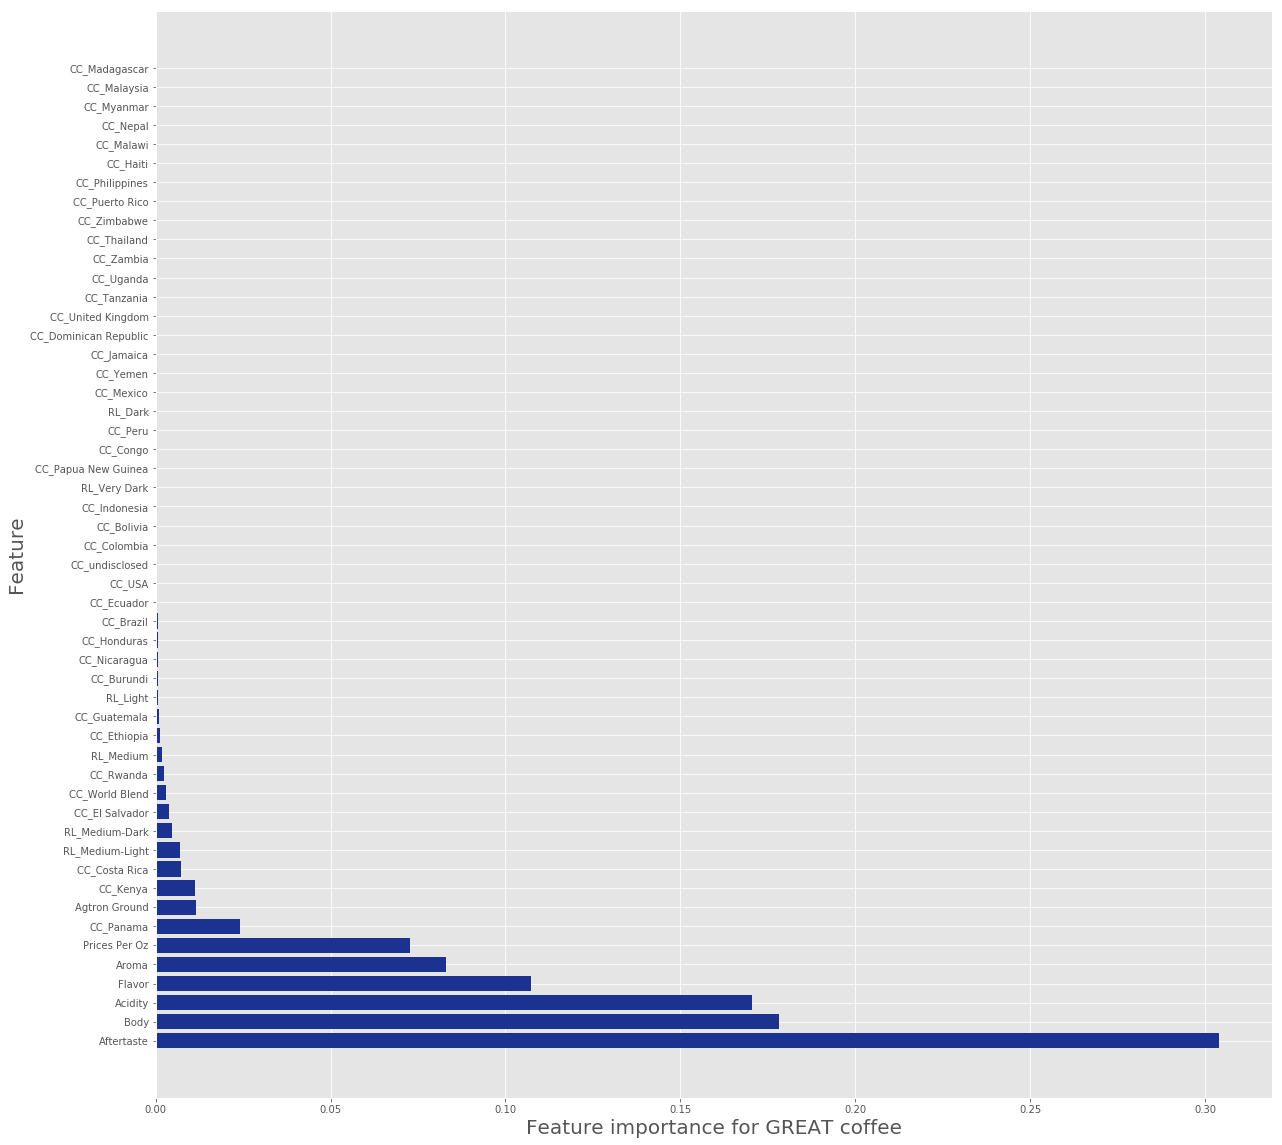

In [26]:
rfs_acc_tr, rfs_acc_te = rf_model(X_train_resampled,y_train_resampled,X_test, y_test, "GREAT")

# Grid Search for Random Forest

Gridsearch terms
- n_estimators: number of trees in the forest
- criterion: this parameter determines how the impurity of a split will be measured. The default value is "gini" but there is also "entropy".
- max_depth: specifies the maximum depth of each tree, default is none, which means that each tree will expand until every leaf is pure (a pure leaf is one where all the data on the leaf comes from the same class.)
- min_samples_split: specifies the minimum numer of samples required to split an internal node
- min_samples_leaf: set the minimum numbers of samples in a leaf node

In [27]:
# rf_clf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [10,20,30,50,100],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 5, 6, 10,20,50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 3,6],
# }

# rf_grid_search = GridSearchCV(rf_clf, param_grid, cv=3)
# rf_grid_search.fit(X_train, y_train)


# print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [28]:
# The values are held in a dictionary

# rf_grid_search.best_params_

In [29]:
# This takes a while to run - 5 minutes - so there is the option to pass in or use hardcoded

# cri = rf_grid_search.best_params_['criterion']
# max_dep = rf_grid_search.best_params_['max_depth']
# min_sam_lea = rf_grid_search.best_params_['min_samples_leaf']
# min_sam_spl = rf_grid_search.best_params_['min_samples_split']
# n_est = rf_grid_search.best_params_['n_estimators']

cri = 'gini'
max_dep = 20
min_sam_lea = 2
min_sam_spl = 5
n_est = 30

For Test Set of GREAT Coffee:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       486
           1       0.98      0.73      0.84        63

   micro avg       0.97      0.97      0.97       549
   macro avg       0.97      0.86      0.91       549
weighted avg       0.97      0.97      0.97       549

Training Accuracy of Random Forest for GREAT coffee with GridSearch:  99.45 %
Testing Accuracy of Random Forest for GREAT coffee with GridSearch:  96.72 %


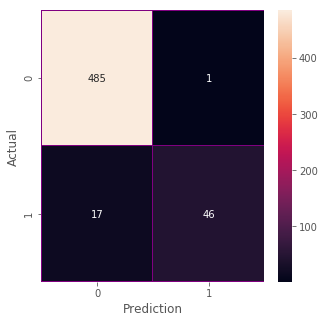

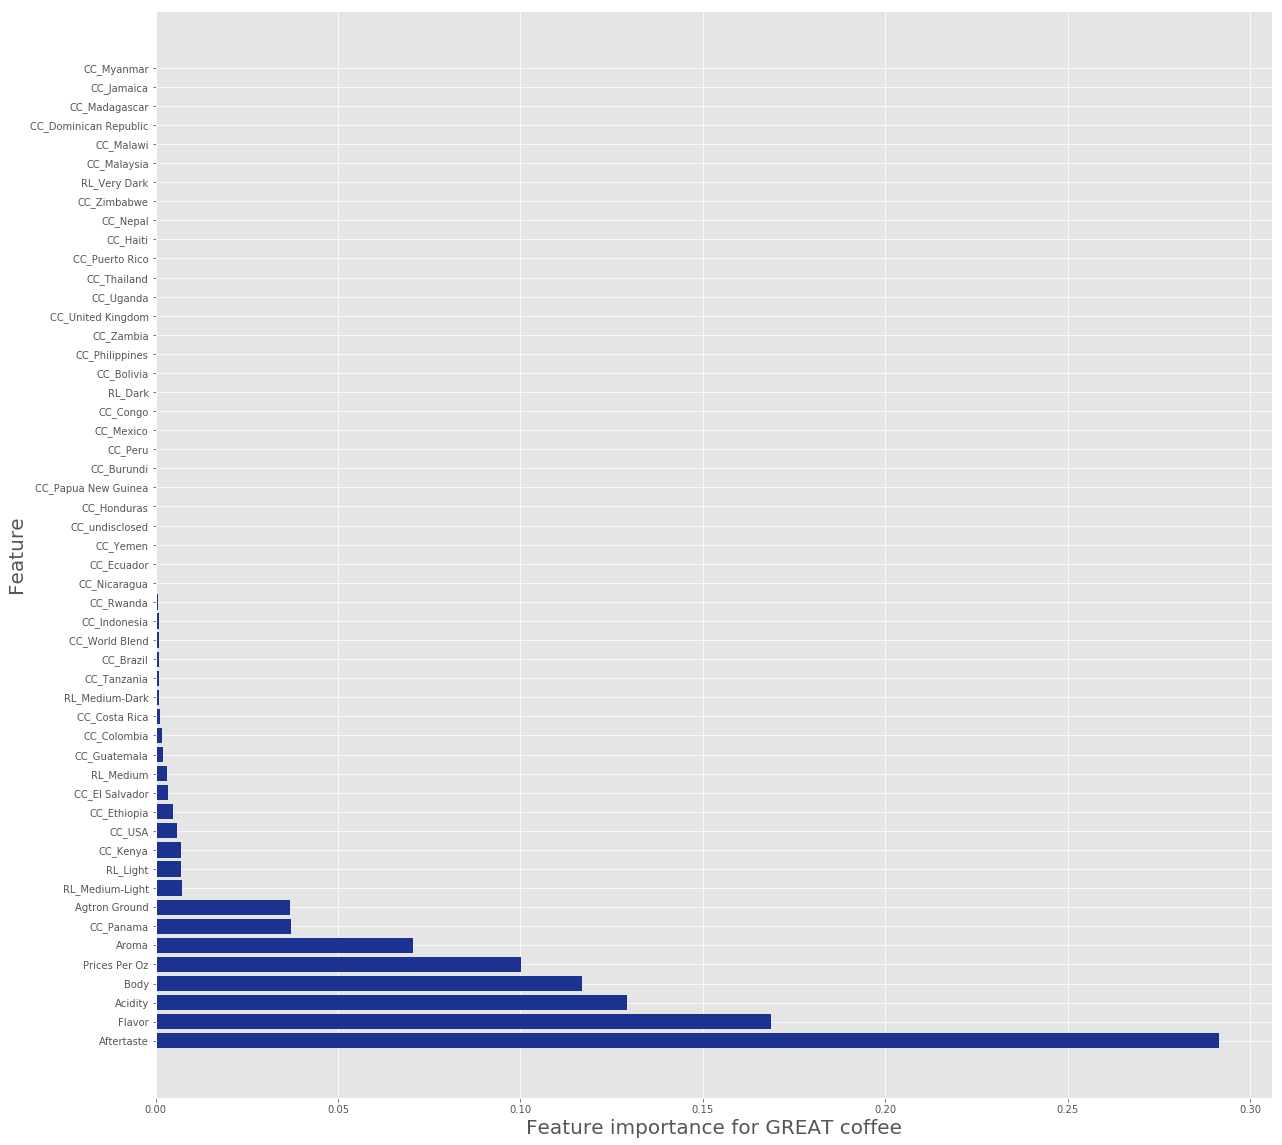

In [30]:
rfgs_acc_tr, rfgs_acc_te = rf_model_gridsearch(X_train,y_train, X_test, y_test, "GREAT",cri, max_dep, min_sam_lea, min_sam_spl, n_est)

# XGBoost 

For Test Set of GREAT Coffee:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       486
           1       0.96      0.87      0.92        63

   micro avg       0.98      0.98      0.98       549
   macro avg       0.97      0.93      0.95       549
weighted avg       0.98      0.98      0.98       549

Training Accuracy of XGBoost for GREAT coffee: 99.76%
Testing Accuracy of XGBoost for GREAT coffee: 98.18%


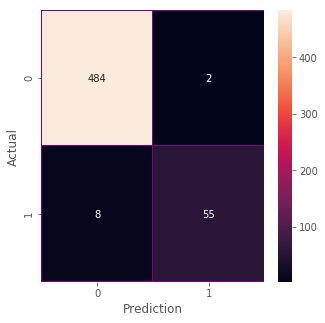

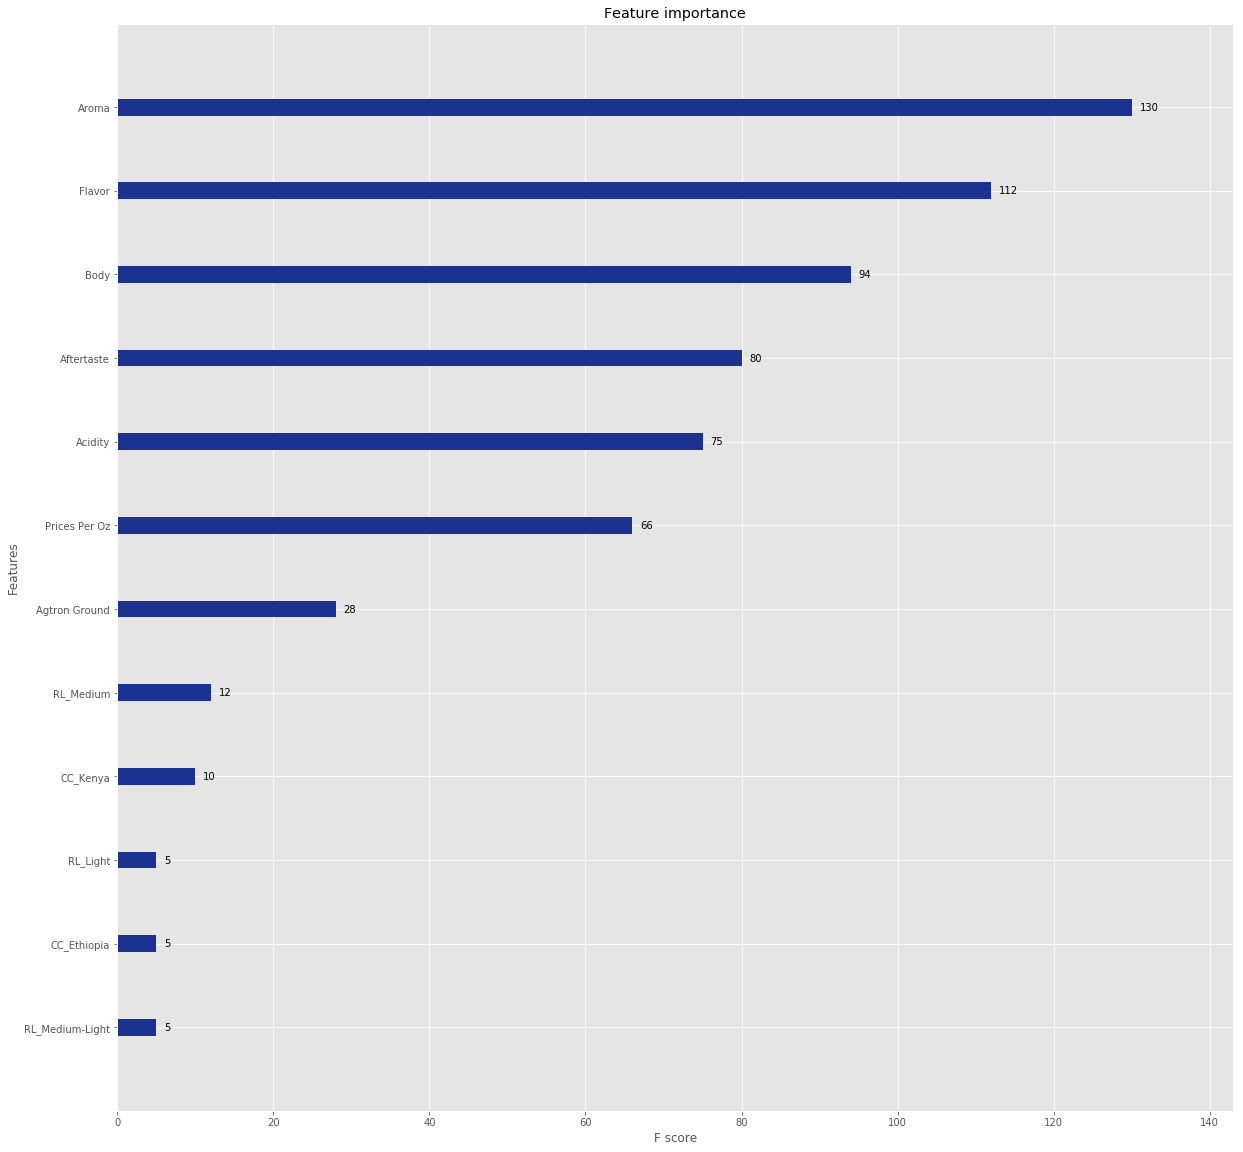

In [31]:
xgb_acc_tr, xgb_acc_te = xgb_model(X_train_B,y_train_B, X_test_B, y_test_B, "GREAT")

# Graphical Accuracy Comparison for GREAT Coffee

In [32]:
temp_accuracy = [lr_acc_tr, lr_acc_te, rf_acc_tr, rf_acc_te, rfs_acc_tr, rfs_acc_te, rfgs_acc_tr, rfgs_acc_te, xgb_acc_tr, xgb_acc_te]
labels = ['LogRegTrain','LogRegTest','RanForTrain','RanForTest','RanForTrainSmote','RanForTestSmote',
         'RanForTrainGrid','RanForTestGrid','XGBTrain','XGBTest']

In [33]:
accuracy = []

for i in temp_accuracy:
    temp = round((i*100),2)
    accuracy.append(temp)

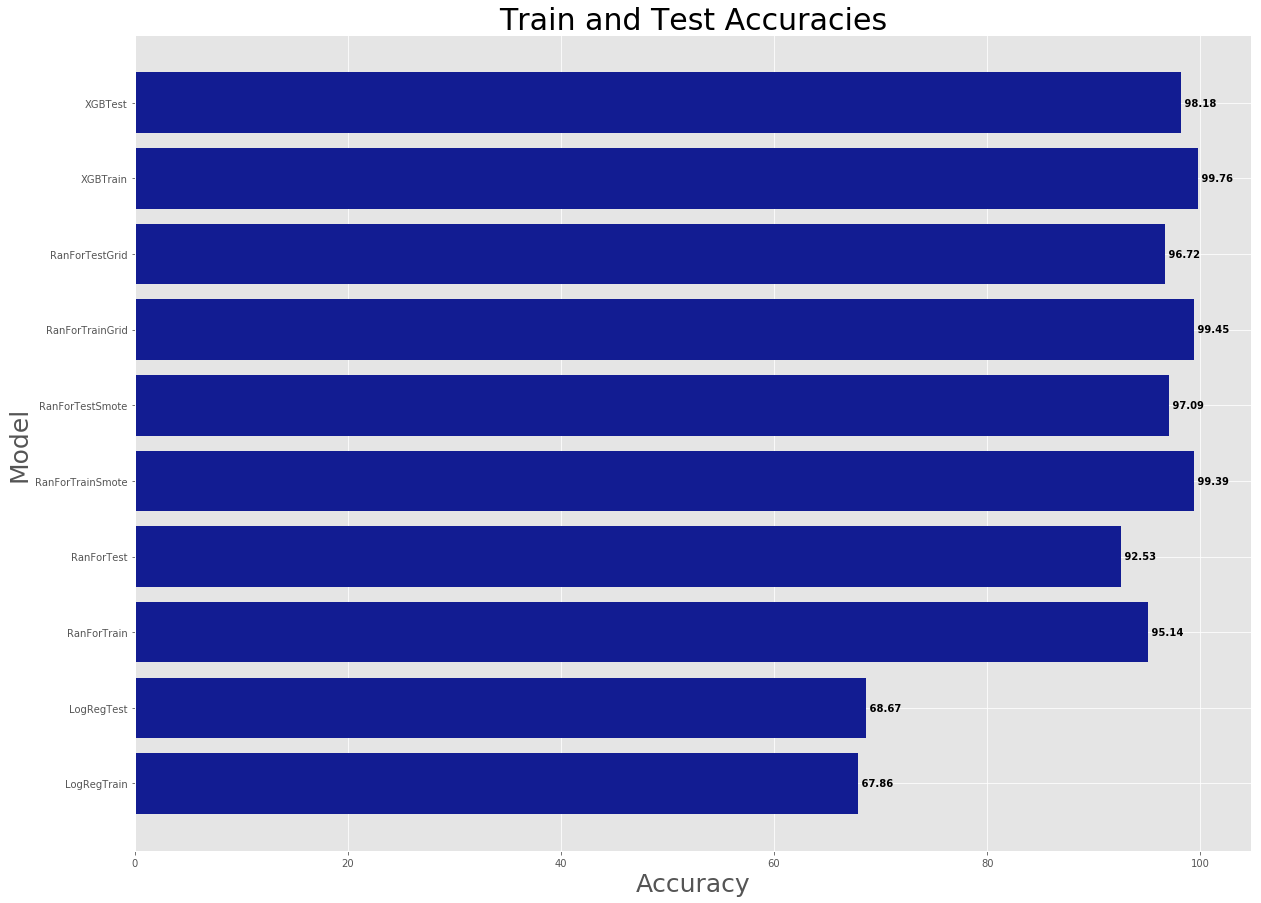

In [34]:
fig, ax = plt.subplots(figsize=(20,15))
plt.barh(labels, accuracy, color = '#121C92', label = "")
plt.title("Train and Test Accuracies", fontsize = 30)
plt.xlabel("Accuracy", fontsize=25)
# plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Model", fontsize = 25)
# plt.legend()

# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

for i, v in enumerate(accuracy):
#     ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    plt.text(v, i, " "+str(v), color='black', va='center', fontweight='bold')
plt.show()

# Modeling for AWFUL Coffee

In [35]:
df = pd.read_csv('cleaned_coffee_reviews.csv')
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


In [36]:
# A rating of 89 or less is about 8% of the coffees
# A rating of 90 or less is about 18% of the coffees

df['Awful'] = [1 if x <= 89 else 0 for x in df['Rating']] 
print('awful: ')
print(df.Awful.value_counts())

awful: 
0    2019
1     176
Name: Awful, dtype: int64


In [37]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')
df = pd.concat([df, rl_dummies, country_dummies], axis=1)

In [38]:
y = df['Awful']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Awful','Coffee Country'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [40]:
# Keep unscaled data for XGBoost
X_train_B = X_train.copy()
X_test_B = X_test.copy()
y_train_B = y_train.copy()
y_test_B = y_test.copy()

In [41]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
scaled_df = pd.DataFrame(X_train, columns=X.columns)

## XGBoost for AWFUL coffee

For Test Set of AWFUL Coffee:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       507
           1       1.00      0.93      0.96        42

   micro avg       0.99      0.99      0.99       549
   macro avg       1.00      0.96      0.98       549
weighted avg       0.99      0.99      0.99       549

Training Accuracy of XGBoost for AWFUL coffee: 99.88%
Testing Accuracy of XGBoost for AWFUL coffee: 99.45%


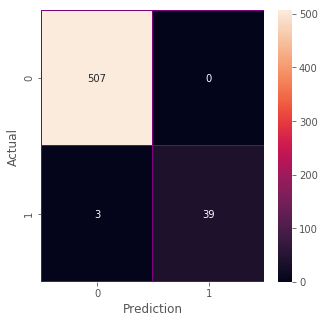

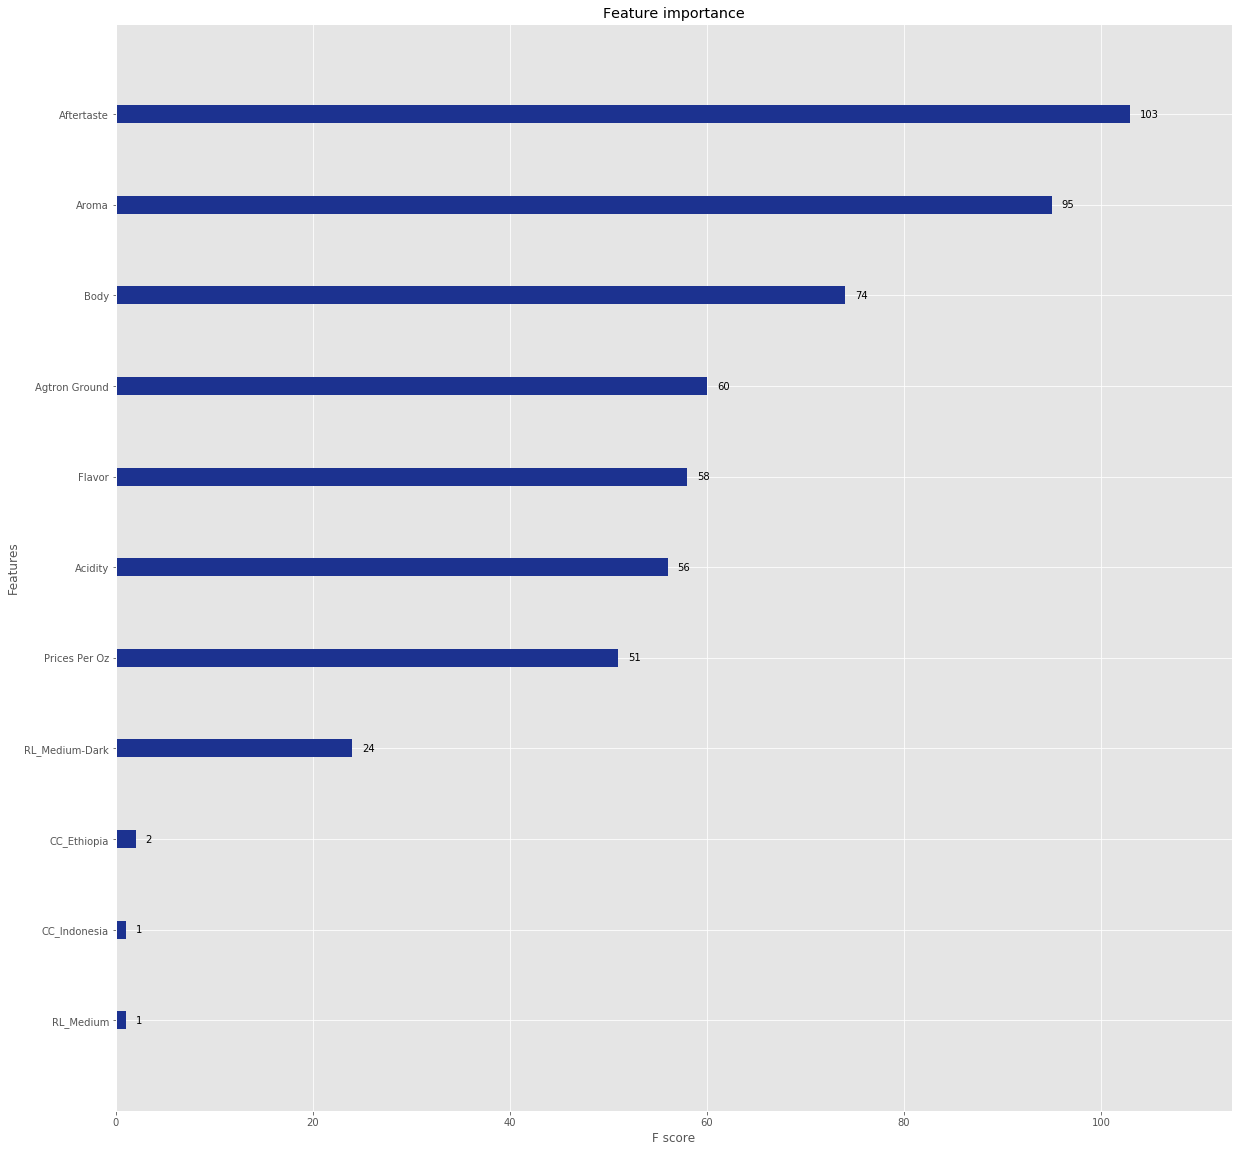

In [42]:
xgb_acc_tr_A, xgb_acc_te_A = xgb_model(X_train_B,y_train_B, X_test_B, y_test_B, "AWFUL")

## Random Forest Using SMOTE for AWFUL coffee

In [69]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [70]:
print("Resampled X_train: ", len(X_train_resampled))
print("Resampled y_train: ", len(y_train_resampled))

Resampled X_train:  3024
Resampled y_train:  3024


For Test Set of AWFUL Coffee:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       507
           1       0.81      0.90      0.85        42

   micro avg       0.98      0.98      0.98       549
   macro avg       0.90      0.94      0.92       549
weighted avg       0.98      0.98      0.98       549

Training Accuracy of Random Forest for AWFUL coffee:  98.97 %
Testing Accuracy of Random Forest for AWFUL coffee:  97.63 %


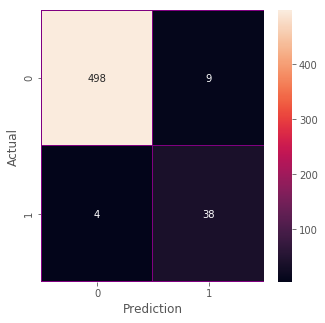

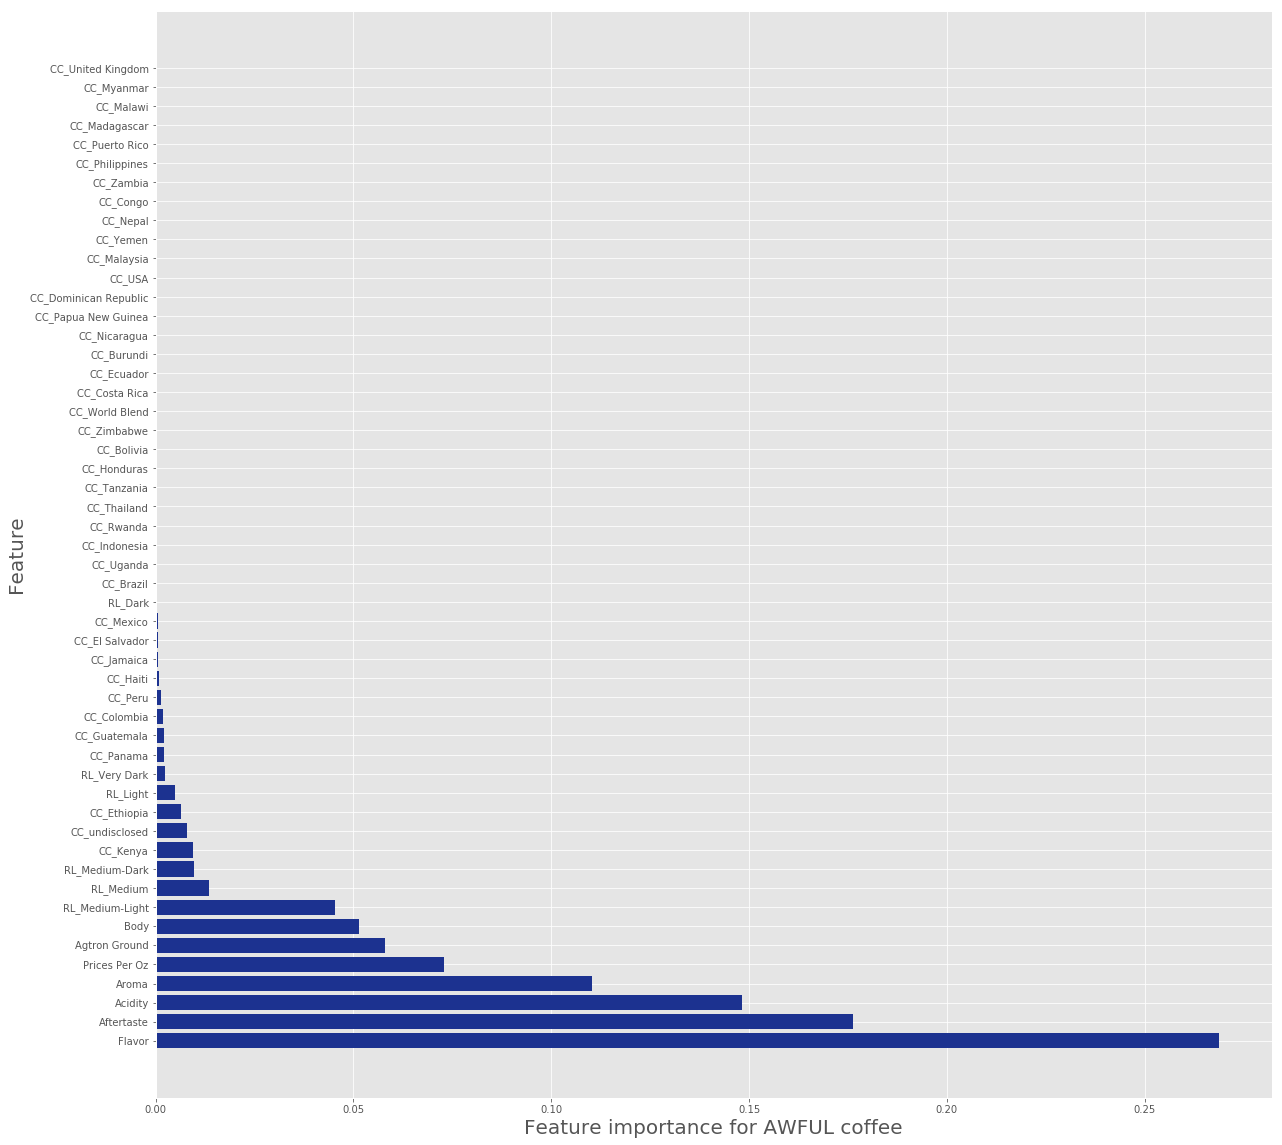

In [71]:
rfs_acc_tr, rfs_acc_te = rf_model(X_train_resampled,y_train_resampled,X_test, y_test, "AWFUL")

# Extra code

In [44]:
# forest = RandomForestClassifier(n_estimators=100)
# forest.fit(X_train, y_train)
# y_pred_test = forest.predict(X_test)
# y_pred_train = forest.predict(X_train)

# print("For Test Set:")
# rf_report = classification_report(y_test, y_pred_test)
# print(rf_report)   

# rf_acc = forest.score(X_test,y_test)
# print('Testing Accuracy of RF: ', round(rf_acc,4)* 100, '%')

# plot_confusion(y_test,y_pred_test)

In [45]:
# plot_feature_importances(forest)

In [46]:
# Graph to plot RF features

# def plot_feature_importances(model, quality):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(20,20))
#     plt.barh(range(n_features), model.feature_importances_, align='center',color='#1c3290') 
# #     plt.yticks(np.arange(n_features), X_train.columns.values) 
#     plt.yticks(np.arange(n_features), X.columns.values) 
#     plt.xlabel('Feature importance for {} coffee'.format(quality), fontsize=20)
#     plt.ylabel('Feature',fontsize=20)

In [47]:
# Random forest accuracy score, I had it slightly incorrect at first

#     rf_acc_te = forest.score(X_test,y_test)
#     rf_acc_te = forest.score(X_test, y_pred_test)
#     rf_acc_tr = forest.score(X_train,y_pred_train)

In [48]:
# Grid search for XGboost

# param_grid = {
#     'learning_rate': [0.1, 0.2],
#     'max_depth': [6],
#     'min_child_weight': [1, 2],
#     'subsample': [0.5, 0.7],
#     'n_estimators': [100],
# }

In [49]:
# Modeling with gridsearch for XGboost


# grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
# grid_clf.fit(X_train_B, y_train_B)

# best_parameters = grid_clf.best_params_

# print('Grid Search found the following optimal parameters: ')
# for param_name in sorted(best_parameters.keys()):
#     print('%s: %r' % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(X_train_B)
# test_preds = grid_clf.predict(X_test_B)
# training_accuracy = accuracy_score(y_train_B, training_preds)
# test_accuracy = accuracy_score(y_test_B, test_preds)

# print('')
# print('Training Accuracy of XGBoost with GridSearch: {:.4}%'.format(training_accuracy * 100))
# print('Testing Accuracy of XGBoost with GridSearch: {:.4}%'.format(test_accuracy * 100))